<a href="https://colab.research.google.com/github/mortarialex/cienciadedados2/blob/main/cd2_0304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIÊNCIA DE DADOS 2 - 03/04**


---


## Regressão: previsão de um valor numérico contínuo

Linear: usada para encontrar a relação entre variáveis. Em ML, atributo e rótulos.

Em termos de machine learning, o modelo é definido como

> *y' = b + w1x1*,

onde *y'* é o rótulo previsto, *b* o viés (bias) e *w1* o peso e *x1* a variável preditora.








---



In [82]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression



---



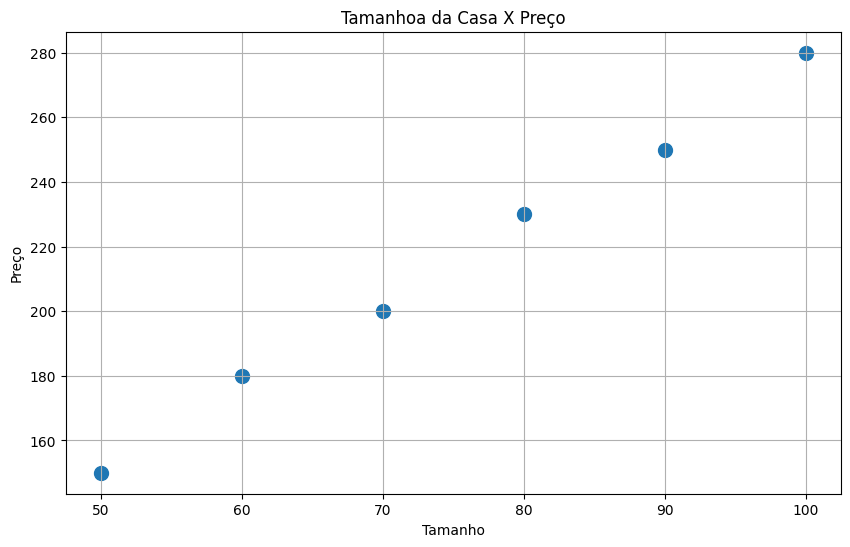

In [83]:
# conjunto de dados fictícios, forçados a serem lineares

X = np.array([50, 60, 70, 80, 90, 100]).reshape(-1,1) # preditora
Y = np.array([150, 180, 200, 230, 250, 280]) #

plt.figure(figsize = (10, 6))
plt.scatter(X,Y, s=100)

plt.title("Tamanhoa da Casa X Preço")
plt.xlabel("Tamanho")
plt.ylabel("Preço")

plt.grid(True)
plt.show()

In [84]:
simpleModel = LinearRegression()
simpleModel.fit(X,Y)

LinearRegression()

In [85]:
# ver o coeficiente de b e o peso calculado

print("Coeficiente Angular (inclinação):", simpleModel.coef_[0])
print("Termo independente (intercepto):", simpleModel.intercept_)

Coeficiente Angular (inclinação): 2.542857142857143
Termo independente (intercepto): 24.285714285714278


In [86]:
# previsão do preço a partir de tamanhos novos

newX = np.array([[65], [75]])
predY = simpleModel.predict(newX)

print("Previsão para uma casa de 65m²: ", predY[0])
print("Previsão para uma casa de 75m²: ", predY[1])

Previsão para uma casa de 65m²:  189.57142857142858
Previsão para uma casa de 75m²:  215.0


Analisando no gráfico acima, é possível notar que os valores gerador pelo predict condizem com os dados presentes.

---
# **Dataset Preços de casas de Boston**

| Atributo       | Tipo          | Descrição                                                                 |
|----------------|---------------|--------------------------------------------------------------------------|
| **MedInc**     | `float`       | Renda média dos residentes (em dezenas de milhares de USD).              |
| **HouseAge**   | `float`       | Idade média das casas (em anos).                                         |
| **AveRooms**   | `float`       | Média de cômodos (quartos + outros) por residência.                      |
| **AveBedrms**  | `float`       | Média de quartos por residência.                                         |
| **Population** | `float`       | População total na área.                                                 |
| **AveOccup**   | `float`       | Média de ocupantes por residência.                                       |
| **Latitude**   | `float`       | Coordenada geográfica (latitude).                                        |
| **Longitude**  | `float`       | Coordenada geográfica (longitude).                                       |
| **MedHouseVal** (Target) | `float` | Valor mediano das casas (em centenas de milhares de USD). |


---



In [87]:
# busca direta de datasets
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


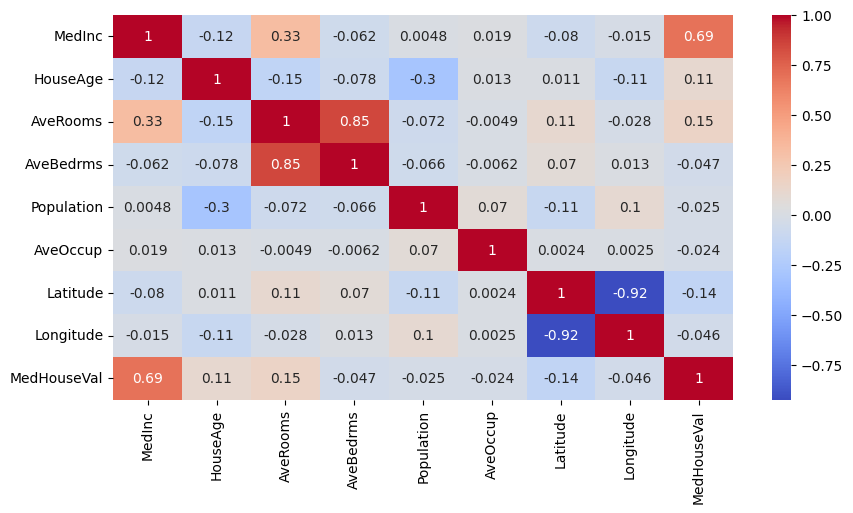

In [88]:
plt.figure(figsize=(10, 5))
sn.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

Nesse gráfico é possível visualizar o nível de relação entre as variáveis, sendo -1 baixo *(azul)* e 1 alto *(vermelho)*.

Dependendo do problema é possível escolher uma variável que melhor ajuda na análise e na performance do modelo.

# Cenário 1 - Prever MedHouseVal

In [94]:
features = ['MedInc']
X = df[features]
y = df['MedHouseVal']

É preciso normalizar os dados para evitar instabilidade.

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalizedX = scaler.fit_transform(X)

Com isso, é possível realizar o treinamento do modelo.

In [96]:
model = LinearRegression()
model.fit(normalizedX, y)

LinearRegression()

Verificar os coeficientes e pesos de cada variável. Abaixo há um algoritmo genérico que pode ser usado em outros contextos.

In [97]:
print("Coeficientes do modelo")

for i, feature in enumerate(features):
  print(f"{feature}: {model.coef_[i]}")

print(f"Termo independente (bias): {model.intercept_}")

Coeficientes do modelo
MedInc: 0.7939893889648998
Termo independente (bias): 2.068558169089147


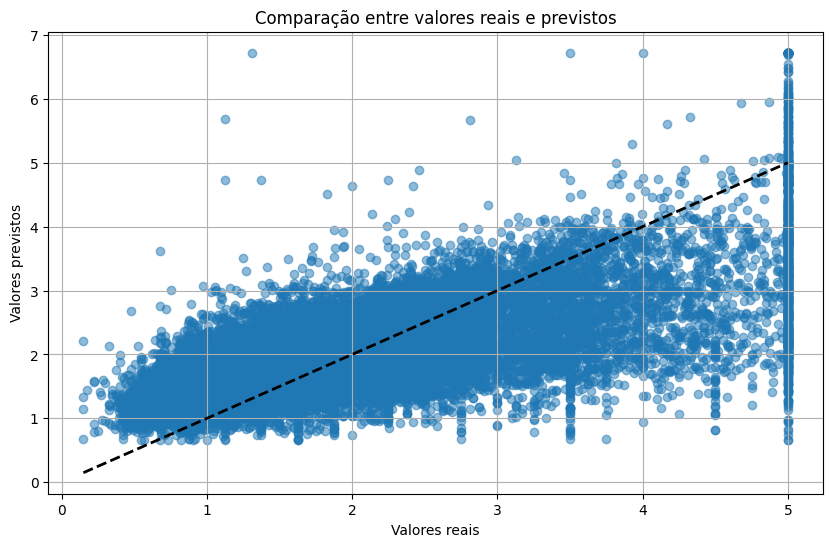

In [99]:
predY = model.predict(normalizedX)

plt.figure(figsize=(10, 6))
plt.scatter(Y, predY, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.title("Comparação entre valores reais e previstos")
plt.grid(True)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predY)
r2 = r2_score(y, predY)

print(f"Erro médio quadrático: {mse}")
print(f"Coeficiente de determinação (R²): {r2}")

Erro médio quadrático: 0.7011311502929526
Coeficiente de determinação (R²): 0.47344749180719903




---


# **Atividade**

Refazer a análise adicionando mais variáveis e comparando o gráfico e os valores das métricas.